In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from sklearn.metrics.pairwise import cosine_similarity

# Problem 1:

In [2]:
df = pd.DataFrame(
    [[4,5,None,5,1,None,3,2],
    [None,3,4,3,1,2,1,None],
    [2,None,1,3,None,4,5,3]],
    columns=['a','b','c','d','e','f','g','h'])

df=df.fillna(0).astype(int)
print(df)

   a  b  c  d  e  f  g  h
0  4  5  0  5  1  0  3  2
1  0  3  4  3  1  2  1  0
2  2  0  1  3  0  4  5  3


Jaccard Index : J(A,B) = |A∩B| / |A∪B|

Jaccard Distance : D(A,B) = 1 – J(A,B)

In [3]:
df1=df[:]
df1=df1.applymap(lambda x: 1 if(x>=1) else 0)
df1  #Boolean Matrix

,a,b,c,d,e,f,g,h
0,1,1,0,1,1,0,1,1
1,0,1,1,1,1,1,1,0
2,1,0,1,1,0,1,1,1


In [4]:
jac_sim = 1 - pairwise_distances(df1, metric = "hamming")
print('Jaccard distance : ')
jac_sim  
# Represented as a 2D array with jaccard distance of each pair of users

Jaccard distance : 


array([[1. , 0.5, 0.5],
       [0.5, 1. , 0.5],
       [0.5, 0.5, 1. ]])

Cosine_Similarity(A,B) : A.B / (|A|.|B|)

Cosine Distance(A,B) = 1 - Cosine_Similarity(A,B)


In [5]:
print('Cosine similarity : ')
print(cosine_similarity(df1))

print('\n Cosine distance : ')
1-cosine_similarity(df1)

Cosine similarity : 
[[1.         0.66666667 0.66666667]
 [0.66666667 1.         0.66666667]
 [0.66666667 0.66666667 1.        ]]

 Cosine distance : 


array([[-2.22044605e-16,  3.33333333e-01,  3.33333333e-01],
       [ 3.33333333e-01, -2.22044605e-16,  3.33333333e-01],
       [ 3.33333333e-01,  3.33333333e-01, -2.22044605e-16]])

In [6]:
df2=df[:]
df2=df2.applymap(lambda x: 1 if(x>2) else 0)
df2

,a,b,c,d,e,f,g,h
0,1,1,0,1,0,0,1,0
1,0,1,1,1,0,0,0,0
2,0,0,0,1,0,1,1,1


In [7]:
jac_sim = 1 - pairwise_distances(df2, metric = "hamming")
print('Jaccard distance : ')
jac_sim  
# Represented as a 2D array with jaccard distance of each pair of users

Jaccard distance : 


array([[1.   , 0.625, 0.5  ],
       [0.625, 1.   , 0.375],
       [0.5  , 0.375, 1.   ]])

In [8]:
print('Cosine similarity : ')
print(cosine_similarity(df2))

print('\n Cosine distance : ')
1-cosine_similarity(df2)

Cosine similarity : 
[[1.         0.57735027 0.5       ]
 [0.57735027 1.         0.28867513]
 [0.5        0.28867513 1.        ]]

 Cosine distance : 


array([[ 0.00000000e+00,  4.22649731e-01,  5.00000000e-01],
       [ 4.22649731e-01, -2.22044605e-16,  7.11324865e-01],
       [ 5.00000000e-01,  7.11324865e-01,  0.00000000e+00]])

In [9]:
ndf=df1[:]
print(df1)
for i in df.index:
    m = ndf.loc[i].mean()
    ndf.loc[i]=ndf.loc[i].apply(lambda x : x-m if x!=0 else 0)
print('\n Normalized DataFrame : ')
ndf

   a  b  c  d  e  f  g  h
0  1  1  0  1  1  0  1  1
1  0  1  1  1  1  1  1  0
2  1  0  1  1  0  1  1  1

 Normalized DataFrame : 


,a,b,c,d,e,f,g,h
0,0.25,0.25,0.00,0.25,0.25,0.00,0.25,0.25
1,0.00,0.25,0.25,0.25,0.25,0.25,0.25,0.00
2,0.25,0.00,0.25,0.25,0.00,0.25,0.25,0.25


In [10]:
print('Cosine similarity : ')
print(cosine_similarity(df1))

print('\n Cosine distance : ')
1-cosine_similarity(df1)

Cosine similarity : 
[[1.         0.66666667 0.66666667]
 [0.66666667 1.         0.66666667]
 [0.66666667 0.66666667 1.        ]]

 Cosine distance : 


array([[-2.22044605e-16,  3.33333333e-01,  3.33333333e-01],
       [ 3.33333333e-01, -2.22044605e-16,  3.33333333e-01],
       [ 3.33333333e-01,  3.33333333e-01, -2.22044605e-16]])


# Problem 2:

In [11]:
path = 'C:/Users/rasav/Desktop'

ratings_cols = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_df = pd.read_csv('C:/Users/rasav/Desktop/ml-100k/u.data', sep='\t', header = None, encoding='latin-1' ,names = ratings_cols)

movie_cols = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies_df = pd.read_csv('C:/Users/rasav/Desktop/ml-100k/u.item', sep = '|', header = None, encoding='latin-1', names = movie_cols)

user_cols = ['user_id', 'age', 'gender', 'occupation', 'zipcode']
users_df = pd.read_csv('C:/Users/rasav/Desktop//ml-100k/u.user', sep = '|',  header = None, encoding = 'latin-1', names = user_cols)

In [12]:
ratings_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
movies_df.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
users_df.head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [15]:
genres = ['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']


In [16]:
ratings_df = ratings_df.drop('timestamp', 1)
ratings_df.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [17]:
input_200 = pd.DataFrame(ratings_df.loc[ratings_df['user_id']==200])
input_15 = pd.DataFrame(ratings_df.loc[ratings_df['user_id']==15])
input_15.head()

,user_id,item_id,rating
206,15,405,2
642,15,749,1
708,15,25,3
1208,15,331,3
1365,15,222,3


In [18]:
user200Movies = movies_df[movies_df['movie id'].isin(input_200['item_id'].tolist())]
print(user200Movies.shape)
user200Movies.head()
user15Movies = movies_df[movies_df['movie id'].isin(input_15['item_id'].tolist())]
user15Movies.head()

(216, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,13,Mighty Aphrodite (1995),30-Oct-1995,NaN,http://us.imdb.com/M/title-exact?Mighty%20Aphr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,14,"Postino, Il (1994)",01-Jan-1994,NaN,"http://us.imdb.com/M/title-exact?Postino,%20Il...",0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
#Resetting the index to avoid future issues
user200Movies = user200Movies.reset_index(drop=True)
#Dropping unnecessary issues due to save memory and to avoid issues
user200GenreTable = user200Movies.drop('movie id', 1).drop('movie title', 1).drop('video release date', 1).drop('release date', 1).drop('IMDb URL',1).drop('unknown',1)
print(user200GenreTable.shape)
user200GenreTable.head()

(216, 18)


,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [20]:
#Resetting the index to avoid future issues
user15Movies = user15Movies.reset_index(drop=True)

#Dropping unnecessary issues due to save memory and to avoid issues
user15GenreTable = user15Movies.drop('movie id', 1).drop('movie title', 1).drop('video release date', 1).drop('release date', 1).drop('IMDb URL',1).drop('unknown',1)
user15GenreTable.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [21]:
print(user200GenreTable.shape)
input_200['rating'].shape

(216, 18)


(216,)

In [22]:
#Dot produt to get weights
user200Profile = np.dot(user200GenreTable.transpose(),input_200['rating'])

# Normalization
s=sum(user200Profile)
user200Profile=list(user200Profile)
for i in range(18):
    user200Profile[i]/=s
    
#The user profile
user200Profile

[0.15055852355512384,
 0.11510441962117533,
 0.03011170471102477,
 0.08790675084992715,
 0.1010199125789218,
 0.0199125789218067,
 0.001942690626517727,
 0.12481787275376396,
 0.021369596891694997,
 0.004371053909664886,
 0.018455560951918408,
 0.0305973773676542,
 0.007770762506070908,
 0.06750849927149101,
 0.08450704225352113,
 0.09664885866925692,
 0.03108305002428363,
 0.006313744536182613]

In [23]:
#Dot produt to get weights
user15Profile = np.dot(user15GenreTable.transpose(),input_15['rating'])

#Normalization
s=sum(user15Profile)
user15Profile=list(user15Profile)
for i in range(18):
    user15Profile[i]/=s
    
#The user profile
user15Profile

[0.10066006600660066,
 0.057755775577557754,
 0.009900990099009901,
 0.0429042904290429,
 0.14356435643564355,
 0.0231023102310231,
 0.0,
 0.22112211221122113,
 0.013201320132013201,
 0.00825082508250825,
 0.0033003300330033004,
 0.013201320132013201,
 0.03135313531353135,
 0.1188118811881188,
 0.04785478547854786,
 0.12046204620462046,
 0.04455445544554455,
 0.0]

In [24]:
movie_95 = movies_df.loc[94][6:]
movie_95

Action         0
Adventure      0
Animation      1
Children's     1
Comedy         1
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        1
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
Name: 94, dtype: object

In [25]:
print('Cosine similarity of Movie 95 with user 200 : ')
print(cosine_similarity([user200Profile,movie_95]))

# Represented as a matrix 

Cosine similarity of Movie 95 with user 200 : 
[[1.         0.40582899]
 [0.40582899 1.        ]]


In [26]:
print('Cosine similarity of Movie 95 with user 15 : ')
print(cosine_similarity([user15Profile,movie_95]))

# Represented as a matrix 

Cosine similarity of Movie 95 with user 15 : 
[[1.        0.3027932]
 [0.3027932 1.       ]]


As user 200 has more similarity than user 15, the film 95 is more likely to be recommended for user 200


# Problem 3:

In [27]:
mov = (movies_df.loc[movies_df['movie title']=='Speed (1994)'])
mov

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
567,568,Speed (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Speed%20(1994/I),0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [28]:
user_details = pd.DataFrame(ratings_df.loc[ratings_df['item_id']==568])
user_details.head()
user_details.shape

(230, 3)

In [29]:
users_details = users_df[users_df['user_id'].isin(user_details['user_id'].tolist())]
users_details.head()

,user_id,age,gender,occupation,zipcode
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
12,13,47,M,educator,29206
19,20,42,F,homemaker,95660
21,22,25,M,writer,40206


Age Distribution of those who rated the movie 'Speed' 


C:\Users\rasav\Anaconda3\envs\viki\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


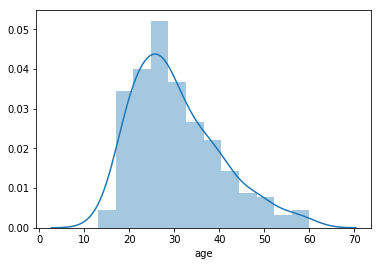

In [30]:
print("Age Distribution of those who rated the movie 'Speed' ")
sns.distplot(users_details['age'])

From the plot, it's clear that majority of the people who liked this movie are in the age group 20 - 30.

So movies watched by ppl in this age group, who also liked Speed movie, can be recommended to our user who rated Speed movie. 

In [31]:
req_df = users_details[(users_details.age >= 20) & (users_details.age <= 35)]
print(req_df.shape)
l=list(req_df.user_id)
req_df.head()

(146, 5)


,user_id,age,gender,occupation,zipcode
21,22,25,M,writer,40206
27,28,32,M,writer,55369
36,37,23,M,student,55105
41,42,30,M,administrator,17870
42,43,29,F,librarian,20854


In [32]:
movies = ratings_df[ratings_df['user_id'].isin(l)]
# Considering movies with higher ratings of similar users
movies = movies.loc[movies.rating==5]
l=list(movies.item_id)
movies = movies_df.loc[movies_df['movie id'].isin(l)]
movies = movies.iloc[:,6:]
movies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [33]:
mo = mov.iloc[:,6:]
mo

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
567,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [34]:
z = []
for i in range(len(movies)):
    z.append((i,1-cosine(movies.iloc[i,:],mo.iloc[0,:])))
z.sort(key=lambda x:x[1],reverse=True)
z[:10]

C:\Users\rasav\Anaconda3\envs\viki\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[(28, 1.0),
 (55, 1.0),
 (281, 0.8660254037844386),
 (42, 0.816496580927726),
 (63, 0.816496580927726),
 (105, 0.816496580927726),
 (119, 0.816496580927726),
 (120, 0.816496580927726),
 (133, 0.816496580927726),
 (198, 0.816496580927726)]

In [35]:
print('The Recommendations are : \n')
movies_df.loc[movies_df['movie id'].isin([x[0] for x in z[:10]])]

The Recommendations are : 



,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
27,28,Apollo 13 (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Apollo%2013%2...,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41,42,Clerks (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Clerks%20(1994),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,55,"Professional, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/Title?L%E9on+(1994),0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
62,63,"Santa Clause, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Santa%20Claus...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
104,105,Sgt. Bilko (1996),29-Mar-1996,NaN,http://us.imdb.com/M/title-exact?Sgt.%20Bilko%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,119,Maya Lin: A Strong Clear Vision (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Maya%20Lin:%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119,120,Striptease (1996),28-Jun-1996,NaN,http://us.imdb.com/M/title-exact?Striptease%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132,133,Gone with the Wind (1939),01-Jan-1939,NaN,http://us.imdb.com/M/title-exact?Gone%20with%2...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
197,198,Nikita (La Femme Nikita) (1990),01-Jan-1990,NaN,http://us.imdb.com/M/title-exact?Nikita%20(1990),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
280,281,"River Wild, The (1994)",01-Jan-1994,NaN,"http://us.imdb.com/M/title-exact?River%20Wild,...",0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
